In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_excel('Data For Cohorts Analysis.xlsx', sheet_name=0, parse_dates=['Join Date', 'End Date'])
df['Join Month'] = pd.to_datetime(df['Join Date']).dt.to_period('M')
df['Duration'] = ((df['End Date'] - df['Join Date']) / np.timedelta64(1, 'M')).astype(int) + 1
# df['Cohort Date'] = (df['Join Date'] - pd.offsets.MonthBegin(1))
df

,User ID,Join Date,End Date,Plan Type,Revenue,Join Month,Duration
0,89950,2020-01-25,2021-03-01,Standard Plan,160.000000,2020-01,13
1,89951,2020-01-26,2020-03-26,Standard Plan,40.000000,2020-01,2
2,89952,2020-01-26,2023-01-27,Pro Plan,1234.285714,2020-01,36
3,89953,2020-01-26,2023-01-27,Pro Plan,1234.285714,2020-01,36
4,89954,2020-01-27,2023-01-27,Pro Plan,1234.285714,2020-01,36
...,...,...,...,...,...,...,...
4707,147299,2021-01-21,2021-05-31,Standard Plan,160.571429,2021-01,5
4708,147320,2021-01-21,2021-05-31,Standard Plan,160.571429,2021-01,5
4709,147323,2021-01-21,2021-04-02,Standard Plan,65.714286,2021-01,3
4710,147330,2021-01-21,2021-03-05,Standard Plan,20.000000,2021-01,2


In [3]:
cols = np.arange(df['Duration'].min(), df['Duration'].max()+1)
cohorts = pd.DataFrame({'cohort': df['Join Month'].unique()}).sort_values('cohort').reset_index(drop=True)
for col in cols:
    cohorts[col] = cohorts['cohort'].apply(lambda x: df[(df['Join Month'] == x) & (df['Duration'] >= col)].count()[0])
cohorts = cohorts.set_index('cohort')
cohorts

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,41
cohort,,,,,,,,,,,,,,,,,,,,,
2019-01,117,112,92,77,62,60,58,58,58,57,...,2,2,2,2,2,0,0,0,0,0
2019-02,90,84,79,68,65,64,59,58,54,48,...,0,0,0,0,0,0,0,0,0,0
2019-03,89,82,70,64,62,61,56,54,51,37,...,0,0,0,0,0,0,0,0,0,0
2019-04,80,67,64,56,55,52,51,45,41,36,...,0,0,0,0,0,0,0,0,0,0
2019-05,87,85,73,65,61,50,46,38,34,22,...,0,0,0,0,0,0,0,0,0,0
2019-06,96,86,78,68,61,52,43,41,41,33,...,0,0,0,0,0,0,0,0,0,0
2019-07,101,100,92,74,72,58,49,46,42,42,...,0,0,0,0,0,0,0,0,0,0
2019-08,103,100,82,72,64,59,47,43,43,43,...,0,0,0,0,0,0,0,0,0,0
2019-09,106,97,86,66,61,58,53,51,48,45,...,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='cohort'>

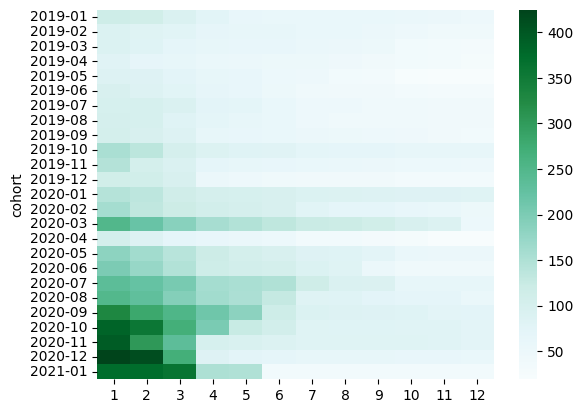

In [4]:
sns.heatmap(cohorts[np.arange(1, 13)], cmap='BuGn')